In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the companies and rounds data (provided on the previous page) into two data frames and name them companies and rounds2 respectively.

In [2]:
companies = pd.read_csv("companies.csv",  encoding= "ISO-8859-1")
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
rounds = pd.read_csv("rounds2.csv", encoding="ISO-8859-1")
rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


## Table 1.1

### 1. How many unique companies are present in rounds2?

In [4]:
rounds.company_permalink = rounds.company_permalink.str.lower()

In [5]:
rounds.company_permalink.nunique()

66370

In [6]:
# Checking null values in raised amount
rounds.raised_amount_usd.isnull().value_counts()

False    94959
True     19990
Name: raised_amount_usd, dtype: int64

In [7]:
rounds = rounds[~rounds.raised_amount_usd.isnull()]

In [8]:
# "raised_amount_usd" null/NaN value are removed from "rounds" 
rounds.shape

(94959, 6)

In [9]:
rounds.company_permalink.nunique()

53915

In [10]:
rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0


#### After removing null values in "raised_ammount_usd" we have 53915 unique companies in rounds2.

***

### 2. How many unique companies are present in companies?

In [11]:
companies.permalink.nunique()

66368

In [12]:
companies.permalink = companies.permalink.str.lower()

In [13]:
companies.permalink.nunique()

66368

In [14]:
# checking is there null name in companies "name"
companies[companies.name.isnull()]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
56916,/organization/tell-it-in,NaN,http://tellitin10.com,Startups,closed,USA,OR,"Portland, Oregon",Portland,01-10-2011


In [15]:
companies[companies.name.isnull()].permalink.apply(lambda x: x[14:].replace("-", " ").strip())

56916    tell it in
Name: permalink, dtype: object

In [16]:
# replacing companies.name==null using its permalink name
companies.loc[companies.name.isnull(), ["name"]] = \
companies[companies.name.isnull()].permalink.apply(lambda x: x[14:].replace("-", " ").strip())

In [17]:
companies[companies.name.isnull()]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [18]:
companies.shape

(66368, 10)

In [19]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


#### Companies df has around 66368 unique companies name

**** 

### Q3. In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.
#### permalink

****

### Q4. Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.
#### No


In [20]:
rounds.company_permalink.isin(companies.permalink).astype(int).value_counts()

1    94958
0        1
Name: company_permalink, dtype: int64

In [21]:
rounds[~rounds.company_permalink.isin(companies.permalink)]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0


****

### Q5. Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?

In [22]:
master_frame = pd.merge(left=rounds, right=companies, left_on="company_permalink", right_on="permalink")
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN


In [23]:
master_frame.shape

(94958, 16)

#### In master_frame, there are around 94958 observation.

****

## Table 1.2

In [24]:
import seaborn as sns

In [25]:
def p_outliers(data_frame, col, ret=True):
    """
    To print custom quantiles.
    And get lower and upper whiskers
    """
    custom_quan = data_frame[col].quantile([0.05,0.1,0.15, 0.25,0.5,0.75, 0.85,.9,0.95, 1])
    print("custom_quan:\n", custom_quan)
    q1 = custom_quan.values[3]
    q3 = custom_quan.values[5]
    iqr = q3-q1
    print("Q1:", q1," Q2:", q3," IRQ:", iqr)
    out_iqr = 1.5*iqr
    lower = q1 - out_iqr
    upper = q3 + out_iqr
    print("\nLower: ", lower," Upper: ", upper)
    if ret:return lower, upper

In [26]:
def remove_outliers(data_frame, col, lower, upper):
    """
    It removes the outliers by giving upper and lower whiskers. 
    """
    print(data_frame.shape)
    print(lower, upper)
    data_frame = data_frame[(data_frame[col]>=lower)&(data_frame[col]<=upper)]
    print(data_frame.shape)
    return data_frame

In [27]:
def boxplt(df):
    """
    To plot boxplot with xscale in log and figsize as (14,7)
    """
    plt.figure(figsize=(14,7))
    sns.boxplot(df)
    plt.xscale('log')
    plt.show()

In [28]:
def distplt(df):
    """
    To plot distplot with xscale in log and figsize as (10,5)
    """
    plt.figure(figsize=(10,5))
    sns.distplot(df)
    plt.xscale('log')
    plt.show()

### Q1. Representative funding amount of venture type 

In [29]:
venture = master_frame[(master_frame.funding_round_type == "venture")]
print(venture.shape)

(50228, 16)


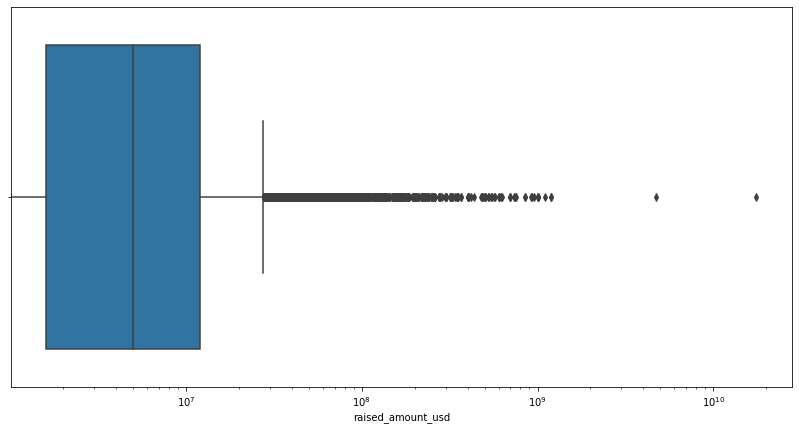

In [30]:
boxplt(venture.raised_amount_usd) # here x wil be scaled in log

In [31]:
p_outliers(venture, "raised_amount_usd", ret=False)

custom_quan:
 0.05    2.041200e+05
0.10    5.000000e+05
0.15    8.750000e+05
0.25    1.600902e+06
0.50    5.000000e+06
0.75    1.200000e+07
0.85    1.930000e+07
0.90    2.500000e+07
0.95    4.000000e+07
1.00    1.760000e+10
Name: raised_amount_usd, dtype: float64
Q1: 1600901.75  Q2: 12000000.0  IRQ: 10399098.25

Lower:  -13997745.625  Upper:  27598647.375


### I think 5 Million USD represents the funding amount of venture type.

***

### Representative funding amount of angel type

In [32]:
angel = master_frame[master_frame.funding_round_type == "angel"]
print(angel.shape)

(4860, 16)


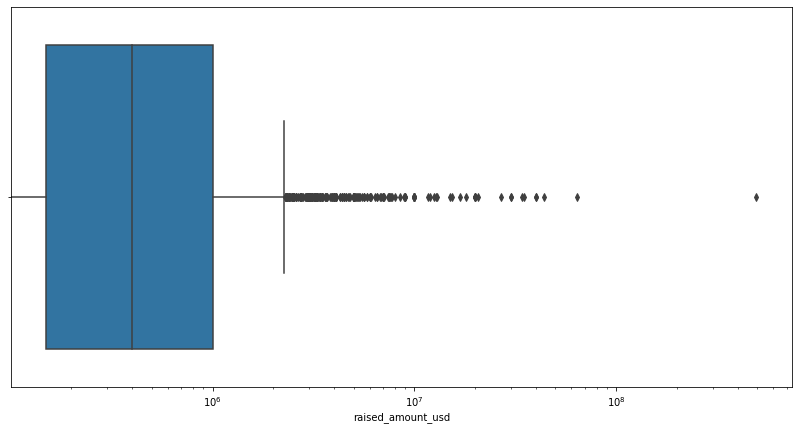

In [33]:
boxplt(angel.raised_amount_usd) # here x wil be scaled in log

In [34]:
p_outliers(angel, "raised_amount_usd", ret=False)

custom_quan:
 0.05        25000.0
0.10        50927.0
0.15       100000.0
0.25       150000.0
0.50       400000.0
0.75      1000000.0
0.85      1400000.0
0.90      1858364.6
0.95      2701547.0
1.00    494511992.0
Name: raised_amount_usd, dtype: float64
Q1: 150000.0  Q2: 1000000.0  IRQ: 850000.0

Lower:  -1125000.0  Upper:  2275000.0


### I think 0.4 Million USD represents the funding amount of angel type.

***


### Representative funding amount of seed type

In [35]:
seed = master_frame[master_frame.funding_round_type == "seed"]
print(seed.shape)

(23602, 16)


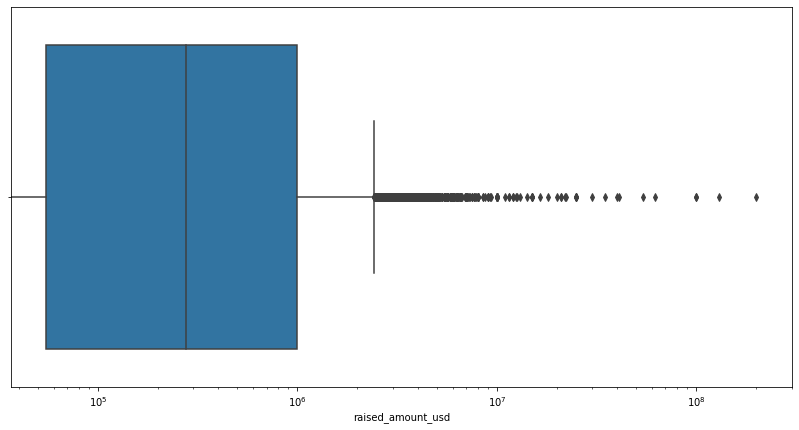

In [36]:
boxplt(seed.raised_amount_usd) # here x wil be scaled in log

In [37]:
p_outliers(seed, "raised_amount_usd", ret=False)

custom_quan:
 0.05        16691.0
0.10        25000.0
0.15        33474.0
0.25        55000.0
0.50       275000.0
0.75      1000000.0
0.85      1500000.0
0.90      1929900.0
0.95      2500000.0
1.00    200000000.0
Name: raised_amount_usd, dtype: float64
Q1: 55000.0  Q2: 1000000.0  IRQ: 945000.0

Lower:  -1362500.0  Upper:  2417500.0


### I think 0.275 Million USD represents the funding amount of seed type.

****


### Representative funding amount of private equity type

In [38]:
pri_equ = master_frame[master_frame.funding_round_type == "private_equity"]
print(pri_equ.shape)

(1936, 16)


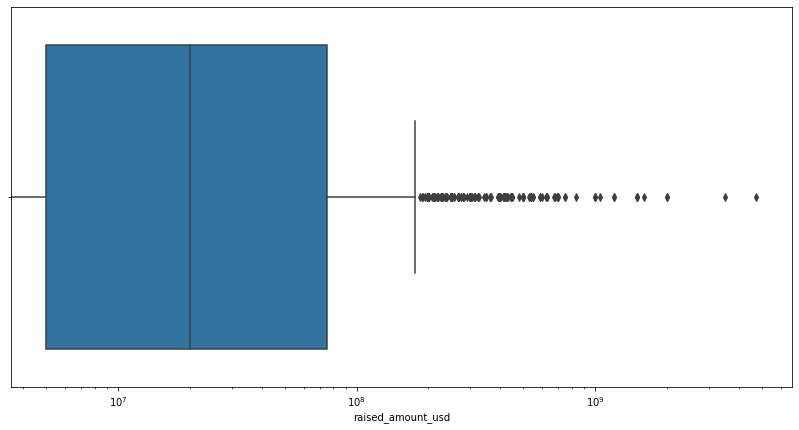

In [39]:
boxplt(pri_equ.raised_amount_usd) # here x wil be scaled in log

In [40]:
p_outliers(pri_equ, "raised_amount_usd", ret=False)

custom_quan:
 0.05    2.980518e+05
0.10    1.200000e+06
0.15    2.500000e+06
0.25    5.000000e+06
0.50    2.000000e+07
0.75    7.500000e+07
0.85    1.157694e+08
0.90    1.601862e+08
0.95    2.925000e+08
1.00    4.745460e+09
Name: raised_amount_usd, dtype: float64
Q1: 5000000.0  Q2: 75000000.0  IRQ: 70000000.0

Lower:  -100000000.0  Upper:  180000000.0


### I think 20 Million USD represents the funding amount of private equity type.

***

### Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?
### Venture will be the most suitable for them.

****
****

## Checkpoint 3: Country Analysis

### Top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

In [41]:
raised_amt = venture.groupby("country_code")[["raised_amount_usd"]].sum() \
            .sort_values(by="raised_amount_usd", ascending=False)

In [42]:
raised_amt

,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
...,...
MCO,6.570000e+05
SAU,5.000000e+05
CMR,3.595610e+05


### Make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

In [43]:
top9 = raised_amt[:9]
top9

,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
FRA,7.259537e+09
ISR,6.907515e+09
DEU,6.346960e+09
JPN,3.363677e+09


In [44]:
top3Eng = venture[venture.country_code.isin(["USA", "GBR", "CAN"])]

In [45]:
top3Eng.country_code.value_counts()

USA    36139
GBR     2055
CAN     1256
Name: country_code, dtype: int64

### Top 3 English-Speaking Countries USA, GBR(UK), CAN(Canada)

***

## Checkpoint 4: Sector Analysis 1

In [46]:
import chardet

In [47]:
with open("mapping.csv", "rb") as rawdata:
    result = chardet.detect(rawdata.read())
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [48]:
mapping = pd.read_csv("mapping.csv", encoding= 'ascii')

In [49]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [50]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [51]:
mapping.category_list = mapping.category_list.str.lower()

In [52]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3d,0,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,0,1


In [53]:
top3Eng.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
6,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
9,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
10,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
16,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012


***

#### Extract the primary sector of each category list from the category_list column

In [54]:
def extract_primary_sec(categ):
    """
    It extracts the first value in the category list if the category is separated by ("|").
    For example, one of the companies’ category_list is Application Platforms|Real Time|Social Network Media.
    -- ‘Application Platforms’ will be considered the primary sector.
    """
    
    if pd.isna(categ) == False:
        fi = categ.find("|")
        if fi>-1:
            categ = categ[:fi]
    return categ

In [55]:
top3Eng["primary_sector"] = top3Eng.category_list.apply(extract_primary_sec).str.lower()

<ipython-input-55-ad09f7c53715>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top3Eng["primary_sector"] = top3Eng.category_list.apply(extract_primary_sec).str.lower()


In [56]:
top3Eng.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
6,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,biotechnology
8,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics
9,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics
10,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,analytics
16,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,apps


#### Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [57]:
# merging top3Eng and mapping as main_sector
main_sector = pd.merge(left=top3Eng, right=mapping, left_on="primary_sector", right_on="category_list")

In [58]:
main_sector.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,...,category_list_y,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,...,biotechnology,0,0,1,0,0,0,0,0,0
1,/organization/10x-genomics,/funding-round/563923487783bdeb5d0b7872f3d6b99a,venture,B,12-01-2015,55000000.0,/organization/10x-genomics,10X Genomics,http://10xgenomics.com,Biotechnology|Technology,...,biotechnology,0,0,1,0,0,0,0,0,0
2,/organization/10x-technologies,/funding-round/39c1441d5098875a925577d0f2ad3904,venture,B,12-01-2015,550000.0,/organization/10x-technologies,10X Technologies,http://10xtechnologies.com,Biotechnology,...,biotechnology,0,0,1,0,0,0,0,0,0
3,/organization/20-20-gene-systems-inc,/funding-round/1df118940a2af3f77ec91a53c2c2ca79,venture,NaN,23-09-2015,2037014.0,/organization/20-20-gene-systems-inc,20/20 Gene Systems Inc.,http://2020gene.com,Biotechnology|Health Diagnostics,...,biotechnology,0,0,1,0,0,0,0,0,0
4,/organization/20-20-gene-systems-inc,/funding-round/63f491aa5ca433cdd7e7e75b208b2fab,venture,NaN,25-09-2012,150000.0,/organization/20-20-gene-systems-inc,20/20 Gene Systems Inc.,http://2020gene.com,Biotechnology|Health Diagnostics,...,biotechnology,0,0,1,0,0,0,0,0,0


In [59]:
main_sector.shape

(36838, 27)

In [60]:
# checking merge went properly or not.
main_sector.iloc[:, -11:]

,primary_sector,category_list_y,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,biotechnology,biotechnology,0,0,1,0,0,0,0,0,0
1,biotechnology,biotechnology,0,0,1,0,0,0,0,0,0
2,biotechnology,biotechnology,0,0,1,0,0,0,0,0,0
3,biotechnology,biotechnology,0,0,1,0,0,0,0,0,0
4,biotechnology,biotechnology,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
36833,tracking,tracking,0,0,0,0,0,0,0,1,0
36834,tracking,tracking,0,0,0,0,0,0,0,1,0
36835,tracking,tracking,0,0,0,0,0,0,0,1,0
36836,tracking,tracking,0,0,0,0,0,0,0,1,0


In [61]:
main_sector.name = main_sector.name.str.lower()

****
****

## Checkpoint 5: Sector Analysis 2

#### Creating three data frames D1, D2 and D3 

In [62]:
d1 = main_sector[main_sector.country_code == "USA"]
d1.head(4)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,...,category_list_y,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,/organization/10x-genomics,/funding-round/563923487783bdeb5d0b7872f3d6b99a,venture,B,12-01-2015,55000000.0,/organization/10x-genomics,10x genomics,http://10xgenomics.com,Biotechnology|Technology,...,biotechnology,0,0,1,0,0,0,0,0,0
2,/organization/10x-technologies,/funding-round/39c1441d5098875a925577d0f2ad3904,venture,B,12-01-2015,550000.0,/organization/10x-technologies,10x technologies,http://10xtechnologies.com,Biotechnology,...,biotechnology,0,0,1,0,0,0,0,0,0
3,/organization/20-20-gene-systems-inc,/funding-round/1df118940a2af3f77ec91a53c2c2ca79,venture,NaN,23-09-2015,2037014.0,/organization/20-20-gene-systems-inc,20/20 gene systems inc.,http://2020gene.com,Biotechnology|Health Diagnostics,...,biotechnology,0,0,1,0,0,0,0,0,0
4,/organization/20-20-gene-systems-inc,/funding-round/63f491aa5ca433cdd7e7e75b208b2fab,venture,NaN,25-09-2012,150000.0,/organization/20-20-gene-systems-inc,20/20 gene systems inc.,http://2020gene.com,Biotechnology|Health Diagnostics,...,biotechnology,0,0,1,0,0,0,0,0,0


In [63]:
d2 = main_sector[main_sector.country_code == "GBR"]
d2.head(4)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,...,category_list_y,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
40,/organization/abcam,/funding-round/114a236877a7d07ac5a6fcbb3681e746,venture,NaN,08-06-2011,1800000.0,/organization/abcam,abcam,http://abcam.com,Biotechnology|Events,...,biotechnology,0,0,1,0,0,0,0,0,0
42,/organization/abcodia,/funding-round/3d20c23d203134ed86c0d1b2bec288b2,venture,B,18-05-2015,8259067.0,/organization/abcodia,abcodia,http://abcodia.com,Biotechnology,...,biotechnology,0,0,1,0,0,0,0,0,0
43,/organization/abcodia,/funding-round/731570ffa854b57788d97b17352ccdfd,venture,NaN,26-02-2014,166681.0,/organization/abcodia,abcodia,http://abcodia.com,Biotechnology,...,biotechnology,0,0,1,0,0,0,0,0,0
44,/organization/abcodia,/funding-round/a63369b87f7d9f99bdd52e2acb306889,venture,NaN,05-11-2014,159810.0,/organization/abcodia,abcodia,http://abcodia.com,Biotechnology,...,biotechnology,0,0,1,0,0,0,0,0,0


In [64]:
d3 = main_sector[main_sector.country_code == "CAN"]
d3.head(4)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,...,category_list_y,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,ondine biomedical inc.,http://ondinebio.com,Biotechnology,...,biotechnology,0,0,1,0,0,0,0,0,0
38,/organization/abattis-bioceuticals,/funding-round/6efcb02103e4c544d4cd90538bff75ea,venture,NaN,07-04-2014,83709.0,/organization/abattis-bioceuticals,abattis bioceuticals,http://abattis.com,Biotechnology,...,biotechnology,0,0,1,0,0,0,0,0,0
39,/organization/abattis-bioceuticals,/funding-round/e09b0c34519d26086c670f529444c8fe,venture,NaN,03-11-2010,297265.0,/organization/abattis-bioceuticals,abattis bioceuticals,http://abattis.com,Biotechnology,...,biotechnology,0,0,1,0,0,0,0,0,0
41,/organization/abcelex-technologies,/funding-round/1fd243003a14e5337d96784ca4b105af,venture,A,28-04-2014,2000000.0,/organization/abcelex-technologies,abcelex technologies,http://www.abcelex.com/,Biotechnology,...,biotechnology,0,0,1,0,0,0,0,0,0


***

### Table 5.1 : Sector-wise Investment Analysis

 #### 1. Total number of investments (count)

In [65]:
d1.country_code.value_counts()

USA    33722
Name: country_code, dtype: int64

In [66]:
d2.country_code.value_counts()

GBR    1930
Name: country_code, dtype: int64

In [67]:
d3.country_code.value_counts()

CAN    1186
Name: country_code, dtype: int64

####  2. Total amount of investment (USD)

In [68]:
d1.raised_amount_usd.sum()

394680394849.0

In [69]:
d2.raised_amount_usd.sum()

19097204731.0

In [70]:
d3.raised_amount_usd.sum()

8816735173.0

#### 3. Top Sector name (no. of investment-wise)
#### 4. Second-best sector (based on count of investments)
#### 5. Third-best sector (based on count of investments)

In [71]:
d1.iloc[:, -9:].sum().sort_values(ascending = False)

Others                                     8243
Cleantech / Semiconductors                 7849
Social, Finance, Analytics, Advertising    5156
News, Search and Messaging                 4301
Health                                     3263
Manufacturing                              2453
Entertainment                              1756
Automotive & Sports                         505
Blanks                                      196
dtype: int64

In [72]:
d2.iloc[:, -9:].sum().sort_values(ascending = False)

Others                                     507
Cleantech / Semiconductors                 433
Social, Finance, Analytics, Advertising    318
News, Search and Messaging                 241
Entertainment                              133
Manufacturing                              122
Health                                     118
Automotive & Sports                         44
Blanks                                      14
dtype: int64

In [73]:
d3.iloc[:, -9:].sum().sort_values(ascending = False)

Cleantech / Semiconductors                 329
Others                                     326
Social, Finance, Analytics, Advertising    164
News, Search and Messaging                 132
Manufacturing                              100
Health                                      61
Entertainment                               50
Automotive & Sports                         14
Blanks                                      10
dtype: int64

#### 6. Number of investments in the top sector (refer to point 3)

In [74]:
d1[(d1.Others == 1)].raised_amount_usd.sum()

82084578045.0

In [75]:
d2[(d2.Others == 1)].raised_amount_usd.sum()

4400423043.0

In [76]:
d3[(d3["Cleantech / Semiconductors"] == 1)].raised_amount_usd.sum()

2778422125.0

#### 7. Number of investments in the second-best sector (refer to point 4)

In [77]:
d1[(d1["Cleantech / Semiconductors"] == 1)].raised_amount_usd.sum()

118764441980.0

In [78]:
d2[(d2["Cleantech / Semiconductors"] == 1)].raised_amount_usd.sum()

5028729267.0

In [79]:
d3[(d3.Others == 1)].raised_amount_usd.sum()

2318566955.0

#### 8. Number of investments in the third-best sector (refer to point 5)

In [80]:
d1[(d1["Social, Finance, Analytics, Advertising"] == 1)].raised_amount_usd.sum()

62062992808.0

In [81]:
d2[(d2["Social, Finance, Analytics, Advertising"] == 1)].raised_amount_usd.sum()

2851116278.0

In [82]:
d3[(d3["Social, Finance, Analytics, Advertising"] == 1)].raised_amount_usd.sum()

1351746195.0

#### 9. For the top sector count-wise (point 3), which company received the highest investment?

In [83]:
d1[(d1.Others == 1)].groupby("name")["raised_amount_usd"].sum().sort_values(ascending=False)

name
sofi            1.365200e+09
snapchat        1.165100e+09
livingsocial    8.182250e+08
facebook        6.152000e+08
zenefits        5.815000e+08
                    ...     
secret space    5.000000e+03
peers app       4.000000e+03
rewardsnap      2.667000e+03
ozmott          2.250000e+03
promisec        0.000000e+00
Name: raised_amount_usd, Length: 4632, dtype: float64

In [84]:
d2[(d2.Others == 1)].groupby("name")["raised_amount_usd"].sum().sort_values(ascending=False)

name
oneweb            500000000.0
farfetch          194500000.0
liquid telecom    150000000.0
picochip          111500000.0
newvoicemedia     111300000.0
                     ...     
skillsbite.com       120000.0
get licensed         100000.0
uni2                  83751.0
socii                 54000.0
cloud 66              22414.0
Name: raised_amount_usd, Length: 347, dtype: float64

In [85]:
d3[(d3["Cleantech / Semiconductors"] == 1)].groupby("name")["raised_amount_usd"].sum().sort_values(ascending=False)

name
enobia pharma                              158261599.0
clementia pharmaceuticals                   92500000.0
d-wave systems                              88596178.0
neuromed pharmaceuticals                    85300000.0
ram power                                   77000000.0
                                              ...     
solaeromed                                    101035.0
mitomics                                      100000.0
igy immune technologies & life sciences        65100.0
kane biotech                                   42467.0
sirona biochem                                 24295.0
Name: raised_amount_usd, Length: 174, dtype: float64

#### 10. For the second-best sector count-wise (point 4), which company received the highest investment?

In [86]:
d1[(d1["Cleantech / Semiconductors"] == 1)].groupby("name")["raised_amount_usd"].sum().sort_values(ascending=False)

name
freescale semiconductor    1.760000e+10
juno therapeutics          1.159803e+09
better place               7.750000e+08
brightsource energy        5.820000e+08
greatpoint energy          5.620000e+08
                               ...     
responsive energy group    1.000000e+04
swarm                      1.000000e+04
sundance diagnostics       5.513000e+03
canfield medical supply    2.750000e+03
cosmosid                   0.000000e+00
Name: raised_amount_usd, Length: 3775, dtype: float64

In [87]:
d2[(d2["Cleantech / Semiconductors"] == 1)].groupby("name")["raised_amount_usd"].sum().sort_values(ascending=False)

name
immunocore                        320000000.0
reneuron group                    150859892.0
circassia                         144630999.0
biovex                            133314585.0
kymab                             120400000.0
                                     ...     
hadrian electrical engineering       151525.0
cellcap technologies                 115819.0
critical outcome technologies         91516.0
sernova                               85077.0
topcat research                       80606.0
Name: raised_amount_usd, Length: 274, dtype: float64

In [88]:
d3[(d3.Others == 1)].groupby("name")["raised_amount_usd"].sum().sort_values(ascending=False)

name
d2l                      165000000.0
builddirect              112214350.0
tropic networks           86000000.0
teradici                  82821087.0
kobo                      78812455.0
                            ...     
torex retail canada          60000.0
vericorder technology        50000.0
tagga                        47560.0
avidretail                   30000.0
exactearth ltd                5000.0
Name: raised_amount_usd, Length: 203, dtype: float64

***

## Checkpoint 6: Plots`

### 1. A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   

In [89]:
rep_value = {'Funding Types':['Venture', 'Angel', 'Seed', 'Private Equity'],
                    'value':[5, 0.4, 0.275, 20]}
rep_value_df = pd.DataFrame(rep_value)

In [90]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.1, 0, 0, 0) # Venture is the selected one, thats why venture explode is 0.1

# Creating label name with its Representative funding amount
label = list(map(lambda x,y: x+" - "+str(y)+"M", rep_value_df['Funding Types'], rep_value_df.value))
label

['Venture - 5.0M', 'Angel - 0.4M', 'Seed - 0.275M', 'Private Equity - 20.0M']

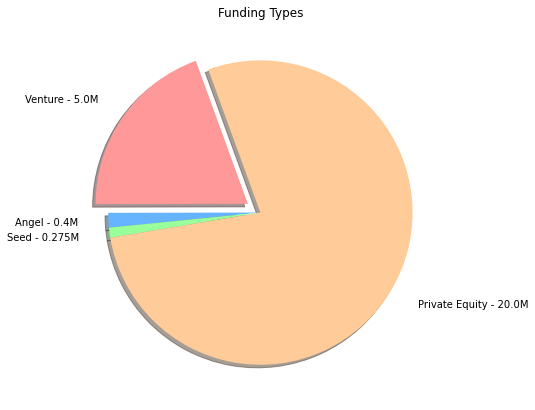

In [91]:
plt.figure(figsize=[7, 7])
plt.pie(rep_value_df.value, explode=explode, labels=label, colors=colors, 
        labeldistance=1.2, shadow=True, startangle=110)
plt.title("Funding Types")
plt.show()

***

### 2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.  

In [92]:
top9.reset_index(level=0, inplace=True)

In [93]:
top9

,country_code,raised_amount_usd
0,USA,4.225108e+11
1,CHN,3.983542e+10
2,GBR,2.024563e+10
3,IND,1.439186e+10
4,CAN,9.583332e+09
5,FRA,7.259537e+09
6,ISR,6.907515e+09
7,DEU,6.346960e+09
8,JPN,3.363677e+09


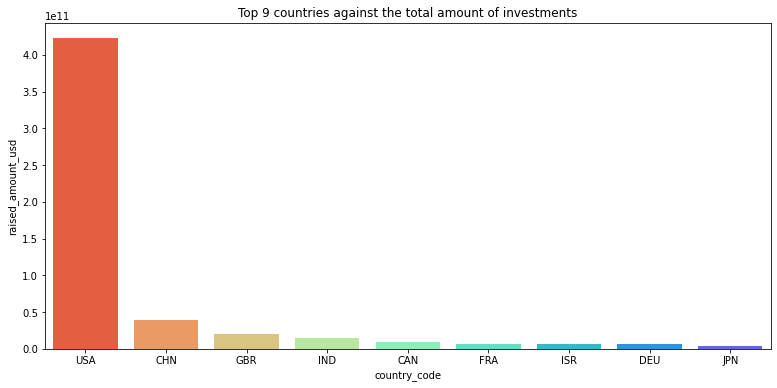

In [94]:
plt.figure(figsize=[13, 6])
sns.barplot( x=top9.country_code, y=top9.raised_amount_usd, palette=("rainbow_r"))
plt.title("Top 9 countries against the total amount of investments")
sns.set_context('talk')
plt.show()

****

### Country wise plot

#### Country 1

In [95]:
country1 = d1.iloc[:, -9:].sum().sort_values(ascending = False).to_frame()
country1.reset_index(level=0, inplace=True)
country1

,index,0
0,Others,8243
1,Cleantech / Semiconductors,7849
2,"Social, Finance, Analytics, Advertising",5156
3,"News, Search and Messaging",4301
4,Health,3263
5,Manufacturing,2453
6,Entertainment,1756
7,Automotive & Sports,505
8,Blanks,196


In [96]:
country1.rename(columns={'index': 'sectors', 0: 'countt'}, inplace=True)
country1

,sectors,countt
0,Others,8243
1,Cleantech / Semiconductors,7849
2,"Social, Finance, Analytics, Advertising",5156
3,"News, Search and Messaging",4301
4,Health,3263
5,Manufacturing,2453
6,Entertainment,1756
7,Automotive & Sports,505
8,Blanks,196


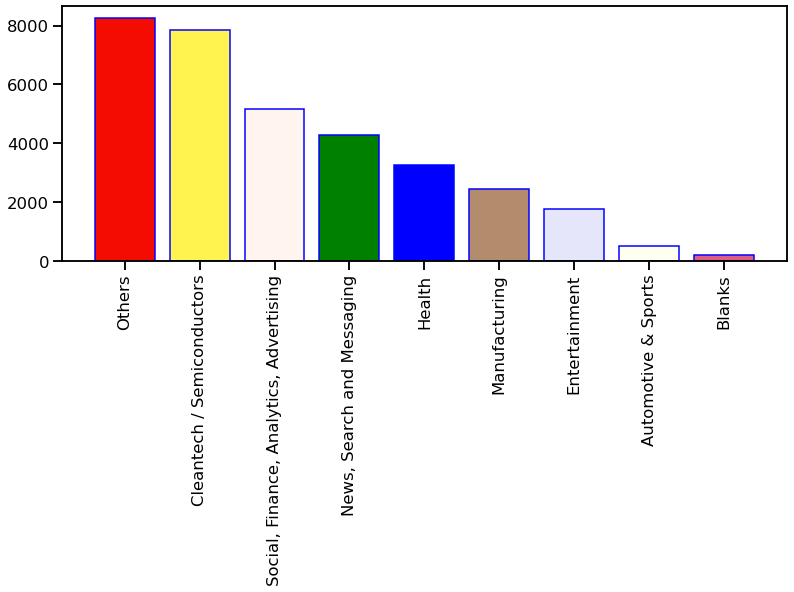

In [97]:
color=["#f40c03",'#Fff44f', '#Fff5ee', 'green', 'blue', "#B38b6d", "#E6e6fa", "#Fffff0", "#De5d83"]
plt.figure(figsize=[13, 6])
x_pos = np.arange(len(country1.sectors))
plt.bar(x_pos, country1.countt, edgecolor='blue', color=color)
plt.xticks(x_pos, country1.sectors, rotation=90)
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.show()

#### Country 2

In [98]:
country2 = d2.iloc[:, -9:].sum().sort_values(ascending = False).to_frame()
country2.reset_index(level=0, inplace=True)
country2

,index,0
0,Others,507
1,Cleantech / Semiconductors,433
2,"Social, Finance, Analytics, Advertising",318
3,"News, Search and Messaging",241
4,Entertainment,133
5,Manufacturing,122
6,Health,118
7,Automotive & Sports,44
8,Blanks,14


In [99]:
country2.rename(columns={'index': 'sectors', 0: 'countt'}, inplace=True)
country2

,sectors,countt
0,Others,507
1,Cleantech / Semiconductors,433
2,"Social, Finance, Analytics, Advertising",318
3,"News, Search and Messaging",241
4,Entertainment,133
5,Manufacturing,122
6,Health,118
7,Automotive & Sports,44
8,Blanks,14


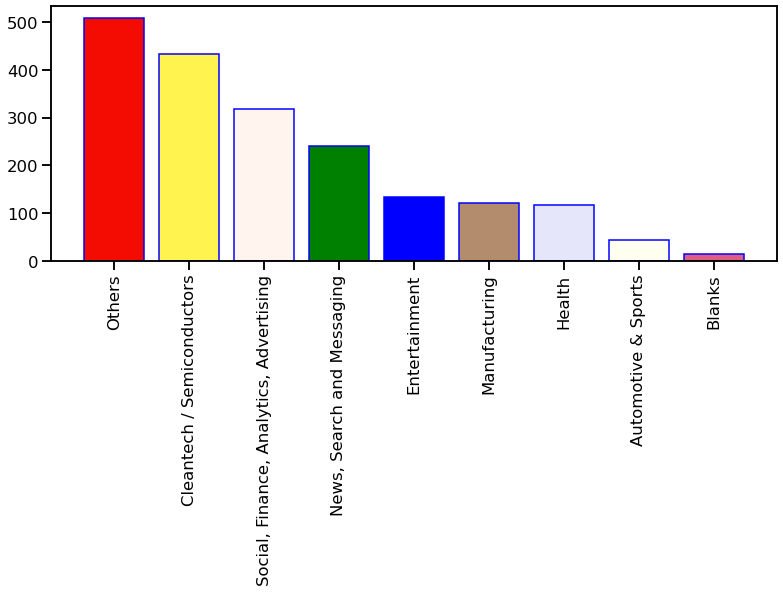

In [100]:
color=["#f40c03",'#Fff44f', '#Fff5ee', 'green', 'blue', "#B38b6d", "#E6e6fa", "#Fffff0", "#De5d83"]
plt.figure(figsize=[13, 6])
x_pos = np.arange(len(country2.sectors))
plt.bar(x_pos, country2.countt, edgecolor='blue', color=color)
plt.xticks(x_pos, country2.sectors, rotation=90)
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.show()

#### Country 3

In [101]:
country3 = d3.iloc[:, -9:].sum().sort_values(ascending = False).to_frame()
country3.reset_index(level=0, inplace=True)
country3

,index,0
0,Cleantech / Semiconductors,329
1,Others,326
2,"Social, Finance, Analytics, Advertising",164
3,"News, Search and Messaging",132
4,Manufacturing,100
5,Health,61
6,Entertainment,50
7,Automotive & Sports,14
8,Blanks,10


In [102]:
country3.rename(columns={'index': 'sectors', 0: 'countt'}, inplace=True)
country3

,sectors,countt
0,Cleantech / Semiconductors,329
1,Others,326
2,"Social, Finance, Analytics, Advertising",164
3,"News, Search and Messaging",132
4,Manufacturing,100
5,Health,61
6,Entertainment,50
7,Automotive & Sports,14
8,Blanks,10


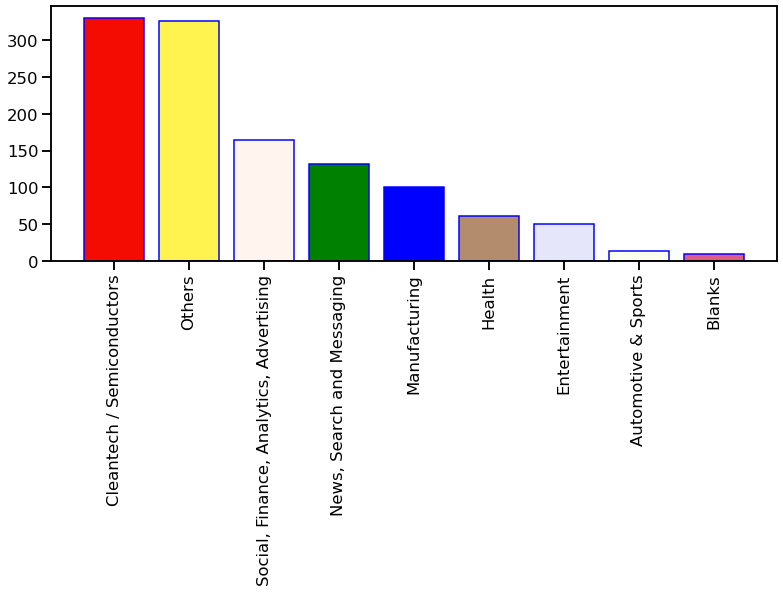

In [103]:
color=["#f40c03",'#Fff44f', '#Fff5ee', 'green', 'blue', "#B38b6d", "#E6e6fa", "#Fffff0", "#De5d83"]
plt.figure(figsize=[13, 6])
x_pos = np.arange(len(country3.sectors))
plt.bar(x_pos, country3.countt, edgecolor='blue', color=color)
plt.xticks(x_pos, country3.sectors, rotation=90)
plt.subplots_adjust(bottom=0.4, top=0.99)
plt.show()

****

### 3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

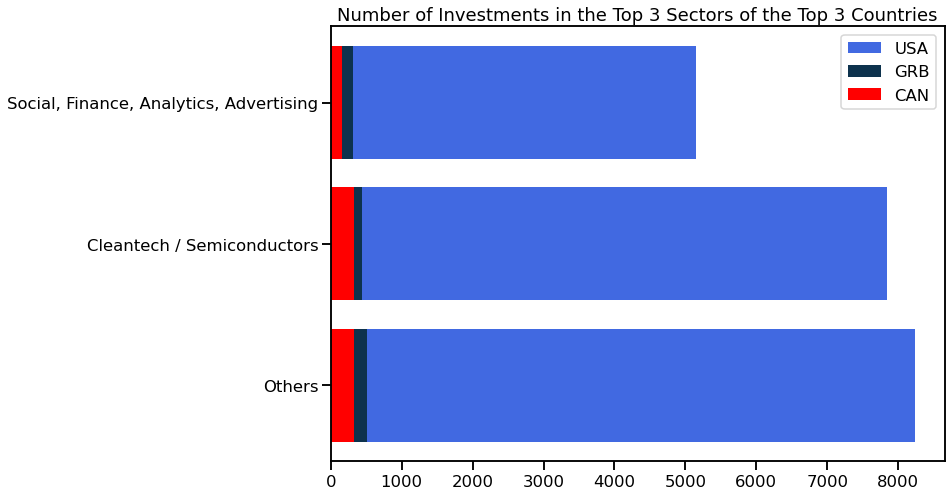

In [104]:
plt.figure(figsize=(11,8))
plt.barh(country1.sectors[:3], country1.countt[:3], color = "#4169e1", label='USA')
plt.barh(country2.sectors[:3], country2.countt[:3], color = "#0d324d", label='GRB')
plt.barh(country3.sectors[:3], country3.countt[:3], color = "#FF0000", label='CAN')
plt.title("Number of Investments in the Top 3 Sectors of the Top 3 Countries")
plt.legend()
plt.show()